## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

Summary Statistics:
             Age        Income Gender
count    6.00000      6.000000      7
unique       NaN           NaN      2
top          NaN           NaN      F
freq         NaN           NaN      4
mean    30.00000  62333.333333    NaN
std      6.60303  11272.385137    NaN
min     22.00000  50000.000000    NaN
25%     25.75000  54000.000000    NaN
50%     29.00000  61000.000000    NaN
75%     33.75000  68000.000000    NaN
max     40.00000  80000.000000    NaN


            Age        Income
count   6.00000      6.000000
mean   30.00000  62333.333333
std     6.60303  11272.385137
min    22.00000  50000.000000
25%    25.75000  54000.000000
50%    29.00000  61000.000000
75%    33.75000  68000.000000
max    40.00000  80000.000000


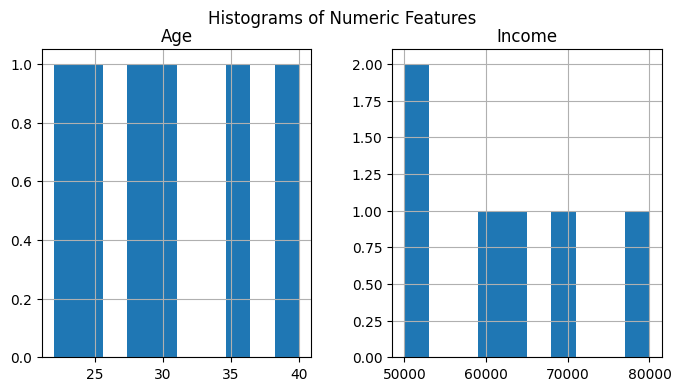

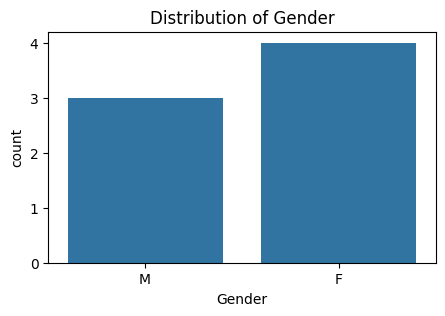

Missing Values by Column:
Age       1
Income    1
Gender    0
dtype: int64


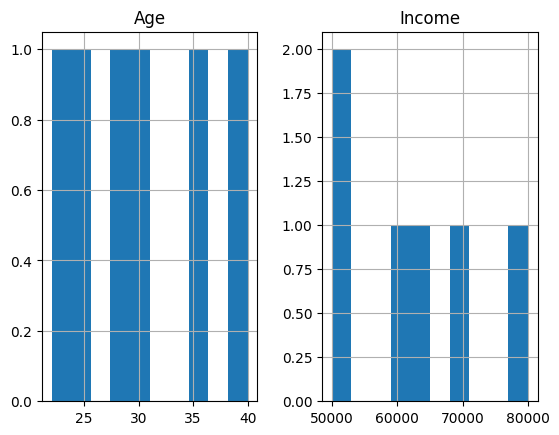

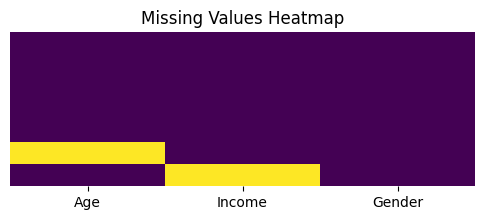

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace with your own data)
data = {
    'Age': [25, 30, 22, 40, 28, None, 35],
    'Income': [50000, 60000, 52000, 80000, 62000, 70000, None],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F']
}
df = pd.DataFrame(data)

# -------------------------------
# Task 1: Summary Statistics
# -------------------------------
print("Summary Statistics:")
print(df.describe(include='all'))  # numeric + categorical overview
print("\n")
try:
    print(df.describe())
except Exception as e:
    print("Error generating summary:", e)

# -------------------------------
# Task 2: Visualize Data Distribution
# -------------------------------
# Numeric data histograms
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].hist(bins=10, figsize=(8,4))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Categorical data countplots
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist()

# -------------------------------
# Task 3: Checking for Null Values
# -------------------------------
print("Missing Values by Column:")
print(df.isnull().sum())

# Visualize missing data heatmap
plt.figure(figsize=(6,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



## Handle Missing & Inconsistent Data Before Applying ML Models

In [12]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'Age': [25, 30, 22, 40, 28, None, 150],
    'Income': [50000, 60000, 52000, 80000, None, 70000, 1200000],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F']
}
df = pd.DataFrame(data)

# -------------------------------
# Task 4: Drop Missing Values
# -------------------------------
# Drop rows with any missing values
df_dropna = df.dropna()
print("After dropping rows with missing values:")
print(df_dropna)
print("\n")
before = len(df)
df = df.dropna()
after = len(df)
print(f"Dropped {before - after} rows with missing values.")

# -------------------------------
# Task 5: Fill Missing Values
# -------------------------------
# Fill numeric missing values with median
df_fillna = df.copy()
for col in ['Age', 'Income']:
    median_val = df_fillna[col].median()
    df_fillna[col].fillna(median_val, inplace=True)

print("After filling missing values with median:")
print(df_fillna)
print("\n")
try:
    imputer = SimpleImputer(strategy='mean')  # Mean works well with normal distribution
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    print("Imputation successful")
except Exception as e:
    print("Imputation failed:", e)

# -------------------------------
# Task 6: Handling Outliers with Capping (Winsorization)
# -------------------------------
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)

df_capped = df_fillna.copy()
for col in ['Age', 'Income']:
    df_capped[col] = cap_outliers(df_capped[col])

print("After capping outliers at 5th and 95th percentiles:")
print(df_capped)
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)
    print(f"Capped outliers in column: {col}")




After dropping rows with missing values:
     Age     Income Gender
0   25.0    50000.0      M
1   30.0    60000.0      F
2   22.0    52000.0      F
3   40.0    80000.0      M
6  150.0  1200000.0      F


Dropped 2 rows with missing values.
After filling missing values with median:
     Age     Income Gender
0   25.0    50000.0      M
1   30.0    60000.0      F
2   22.0    52000.0      F
3   40.0    80000.0      M
6  150.0  1200000.0      F


Imputation successful
After capping outliers at 5th and 95th percentiles:
     Age    Income Gender
0   25.0   50400.0      M
1   30.0   60000.0      F
2   22.6   52000.0      F
3   40.0   80000.0      M
6  128.0  976000.0      F
Capped outliers in column: Age
Capped outliers in column: Income


/tmp/ipykernel_29603/2698053144.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(median_val, inplace=True)
/tmp/ipykernel_29603/2698053144.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

## Choose the Right Scaling Method

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# Sample data
data = {
    'Age': [25, 30, 22, 40, 28, 27, 35],
    'Income': [50000, 60000, 52000, 80000, 62000, 70000, 120000]
}
df = pd.DataFrame(data)

# -------------------------------
# Task 7: Min-Max Scaling
# -------------------------------
min_max_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

print("Min-Max Scaled Data:")
print(df_minmax_scaled)
print("\n")

# -------------------------------
# Task 8: Robust Scaling
# -------------------------------
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)

print("Robust Scaled Data:")
print(df_robust_scaled)
print("\n")

# -------------------------------
# Task 9: MaxAbs Scaling
# -------------------------------
maxabs_scaler = MaxAbsScaler()
df_maxabs_scaled = pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)

print("MaxAbs Scaled Data:")
print(df_maxabs_scaled)
try:
    check_numeric(df)
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
except Exception as e:
    print("Scaling failed:", e)





Min-Max Scaled Data:
        Age    Income
0  0.166667  0.000000
1  0.444444  0.142857
2  0.000000  0.028571
3  1.000000  0.428571
4  0.333333  0.171429
5  0.277778  0.285714
6  0.722222  1.000000


Robust Scaled Data:
        Age    Income
0 -0.461538 -0.631579
1  0.307692 -0.105263
2 -0.923077 -0.526316
3  1.846154  0.947368
4  0.000000  0.000000
5 -0.153846  0.421053
6  1.076923  3.052632


MaxAbs Scaled Data:
     Age    Income
0  0.625  0.416667
1  0.750  0.500000
2  0.550  0.433333
3  1.000  0.666667
4  0.700  0.516667
5  0.675  0.583333
6  0.875  1.000000
Scaling failed: name 'check_numeric' is not defined


## Keep Track of Data Transformations for Reproducibility

In [14]:
# Task 10: Log Data Preprocessing Steps
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Sample dataset
data = {
    'Age': [25, 30, np.nan, 40, 28],
    'Income': [50000, 60000, 52000, np.nan, 62000]
}
df = pd.DataFrame(data)

# Transformation log
preprocessing_log = []

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
preprocessing_log.append("Imputed missing values using mean strategy.")

# Step 2: Scale using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
preprocessing_log.append("Applied Min-Max scaling to numerical features.")

# Display the log
print("Preprocessing Log:")
for step in preprocessing_log:
    print("-", step)





# Task 11: Store Transformation Parameters
import joblib

# Save the imputer and scaler
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')
scaler_params = {
    "min": scaler.data_min_.tolist(),
    "max": scaler.data_max_.tolist()
}
print("Stored scaling parameters:", scaler_params)





Preprocessing Log:
- Imputed missing values using mean strategy.
- Applied Min-Max scaling to numerical features.
Stored scaling parameters: {'min': [25.0, 50000.0], 'max': [40.0, 62000.0]}
